In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Mall_Customers.csv')

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.drop(columns=['CustomerID','Gender'],inplace=True) # improved results with gender column dropped

In [5]:
#df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Male' else 1)

In [6]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
df.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [11]:
import random
import numpy as np
import pandas as pd

class KMeans_Scratch:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        
        X = X.values if isinstance(X, pd.DataFrame) else X
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            self.centroids = self.move_centroids(X, cluster_group)
            if np.allclose(old_centroids, self.centroids):
                break

        wcss = self.calculate_wcss(X, cluster_group)
        return cluster_group, wcss  

    def assign_clusters(self, X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

    def calculate_wcss(self, X, cluster_group):
        wcss = 0
        for i in range(self.n_clusters):
            cluster_points = X[cluster_group == i]  
            centroid = self.centroids[i]  
            distance_squared = np.sum((cluster_points - centroid) ** 2)
            wcss += distance_squared

        return wcss


In [12]:
wcss_arr=[]
for i in range(2,6):
    kmeans = KMeans_Scratch(n_clusters=i)  
    clusters, wcss = kmeans.fit_predict(df)
    wcss_arr.append(wcss) 

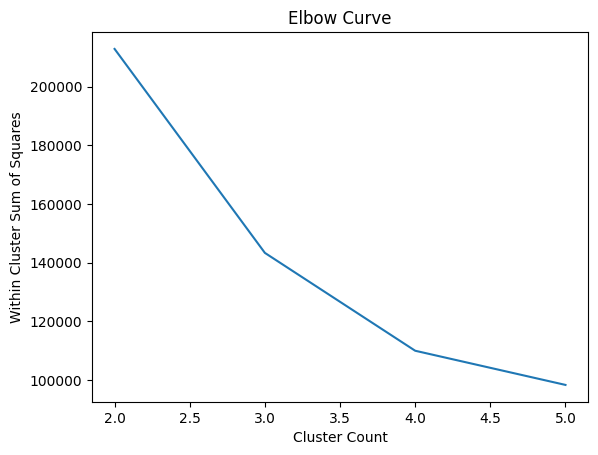

In [13]:
import matplotlib.pyplot as plt
plt.xlabel("Cluster Count")
plt.ylabel("Within Cluster Sum of Squares")
plt.title("Elbow Curve")
plt.plot(range(2,6),wcss_arr)

##### The curve flattens significantly around k=4. This is likely the optimal number of clusters.

In [14]:
kmeans = KMeans_Scratch(n_clusters=4)  
clusters, wcss = kmeans.fit_predict(df)

C:\Users\Sindhu\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


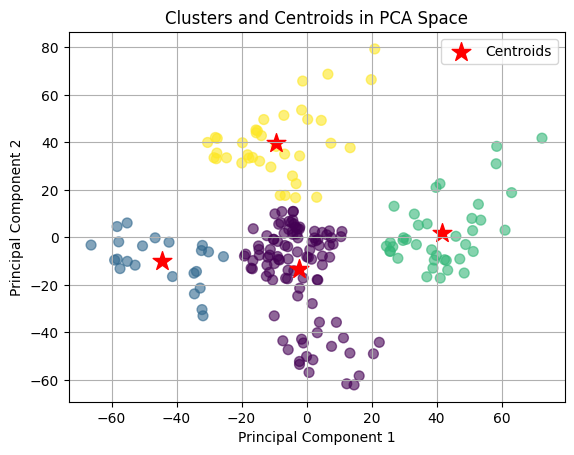

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(df)

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.6)

centroids = kmeans.centroids
centroids_pca = pca.transform(centroids)  
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='*', label='Centroids')

plt.title('Clusters and Centroids in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
from sklearn.metrics import silhouette_score
clusters, _ = kmeans.fit_predict(df)
silhouette_avg = silhouette_score(df, clusters)
print(f'Silhouette Score: {silhouette_avg}')



Silhouette Score: 0.3923692568421039


In [17]:
df['Cluster']=clusters
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,1
1,21,15,81,3
2,20,16,6,1
3,23,16,77,3
4,31,17,40,1


C:\Users\Sindhu\AppData\Local\Temp\ipykernel_20636\439989881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=df, palette="Set3")


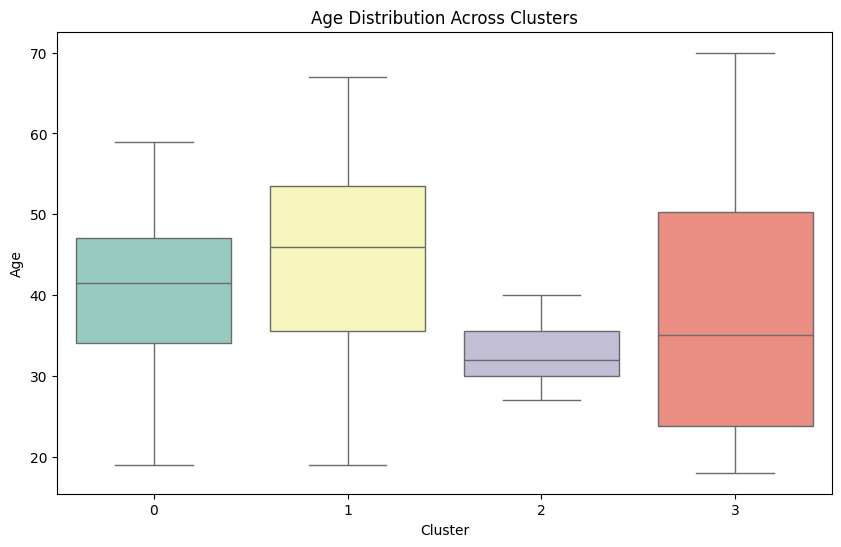

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=df, palette="Set3")
plt.title('Age Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

C:\Users\Sindhu\AppData\Local\Temp\ipykernel_20636\3304642327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette="Set3")


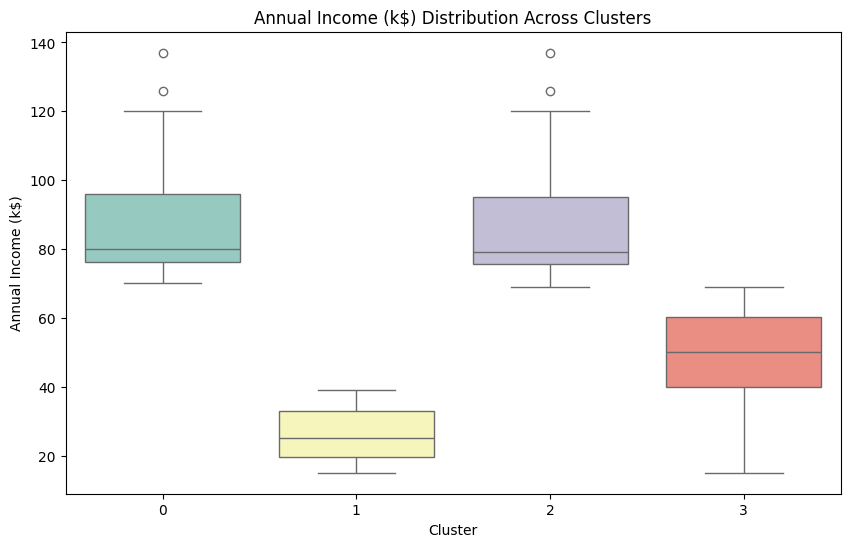

In [19]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette="Set3")
plt.title('Annual Income (k$) Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.show()

C:\Users\Sindhu\AppData\Local\Temp\ipykernel_20636\3021414983.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette="Set3")


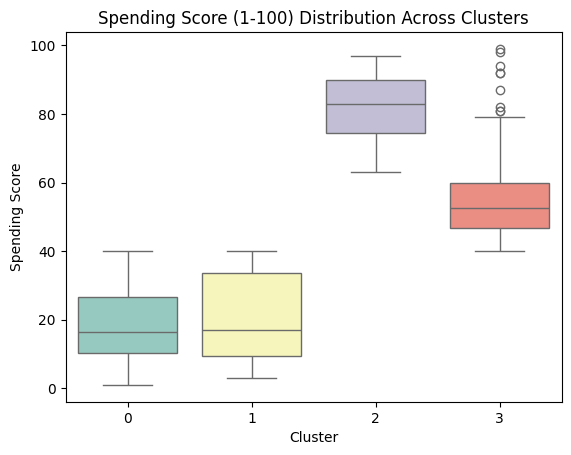

In [20]:

sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette="Set3")
plt.title('Spending Score (1-100) Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spending Score')
plt.show()

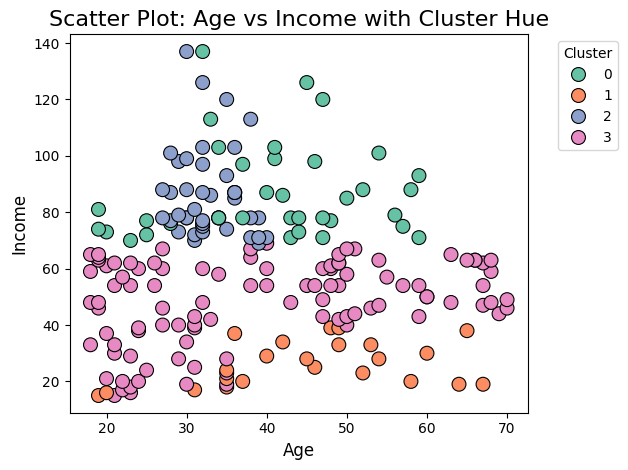

In [21]:
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Cluster', palette='Set2', s=100, edgecolor='black')

plt.title('Scatter Plot: Age vs Income with Cluster Hue', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)

plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

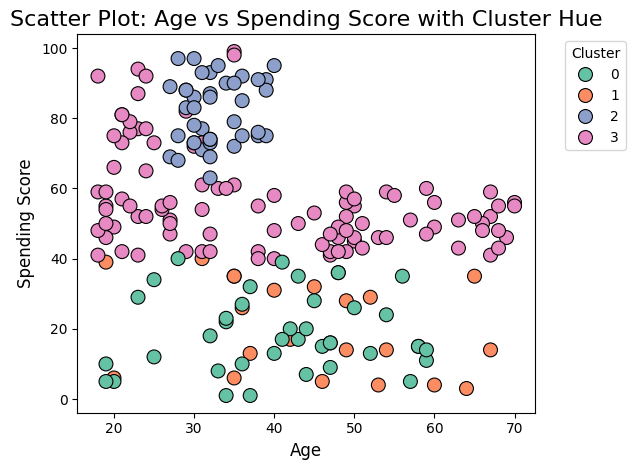

In [22]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100, edgecolor='black')

plt.title('Scatter Plot: Age vs Spending Score with Cluster Hue', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)

plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

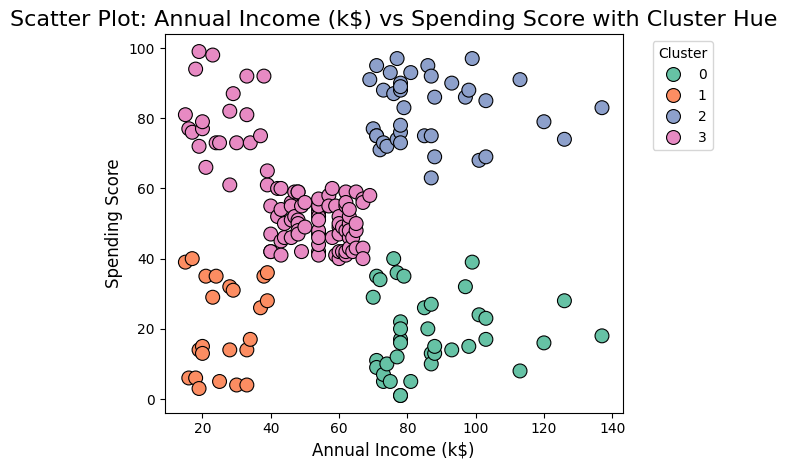

In [23]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100, edgecolor='black')

plt.title('Scatter Plot: Annual Income (k$) vs Spending Score with Cluster Hue', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)

plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
df.drop(columns='Cluster',inplace=True)

In [25]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [26]:
def min_max_scale(df, numeric_columns):
    df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].min()) / (df[numeric_columns].max() - df[numeric_columns].min())
    return df
min_max_scale(df,numeric_columns='Age')
min_max_scale(df,numeric_columns='Annual Income (k$)')
min_max_scale(df,numeric_columns='Spending Score (1-100)')


,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


In [27]:
''''
def z_score_standardize(df, numeric_columns):
    df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()
    return df

z_score_standardize(df,numeric_columns='Age')
z_score_standardize(df,numeric_columns='Annual Income (k$)')
z_score_standardize(df,numeric_columns='Spending Score (1-100)')
'''

"'\ndef z_score_standardize(df, numeric_columns):\n    df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()\n    return df\n\nz_score_standardize(df,numeric_columns='Age')\nz_score_standardize(df,numeric_columns='Annual Income (k$)')\nz_score_standardize(df,numeric_columns='Spending Score (1-100)')\n"

In [28]:
import numpy as np

class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None

    def fit(self, X):
        n_samples = X.shape[0]
        self.labels_ = np.full(n_samples, -1) 
        cluster_id = 0

        for i in range(n_samples):
            if self.labels_[i] != -1:  
                continue
            
           
            neighbors = self._region_query(X, i)
            
            
            if len(neighbors) < self.min_samples:
                self.labels_[i] = -1  
            else:
                
                self._expand_cluster(X, i, neighbors, cluster_id)
                cluster_id += 1

    def _region_query(self, X, index):
        
        distances = np.linalg.norm(X - X[index], axis=1)
        return np.where(distances <= self.eps)[0]

    def _expand_cluster(self, X, index, neighbors, cluster_id):
        
        self.labels_[index] = cluster_id  
        i = 0
        while i < len(neighbors):
            point = neighbors[i]
            if self.labels_[point] == -1:  
                self.labels_[point] = cluster_id
            elif self.labels_[point] == -1:  
                self.labels_[point] = cluster_id
                point_neighbors = self._region_query(X, point)
                if len(point_neighbors) >= self.min_samples:
                    neighbors = np.append(neighbors, point_neighbors)
            i += 1


In [29]:
X = df.iloc[:, 1:].values 
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(X)

print("Cluster labels:", dbscan.labels_)

Cluster labels: [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 2 1 2 1 0 3 2 1 2 1 2 3 2 1 2 1 2 1 2 3
 2 1 2 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 4 5]


In [30]:
dbscan = DBSCAN(eps=0.3, min_samples=7)
dbscan.fit(X)
labels=dbscan.labels_
print("Cluster labels:", dbscan.labels_)


Cluster labels: [0 1 2 1 0 1 2 1 2 1 0 1 0 1 0 1 0 0 0 1 0 1 2 1 0 1 0 0 0 1 2 1 2 1 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 0 0 0 3 0 3 0 0 0 0 0 0 3 3 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 5 3 5 4 5 3 5 3 5 3 5 4 5 3 5 3 5 4 5 4 5 4 5 4
 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 6 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 6 5 4 5 6 7 8 7 8 7 8 7 8]


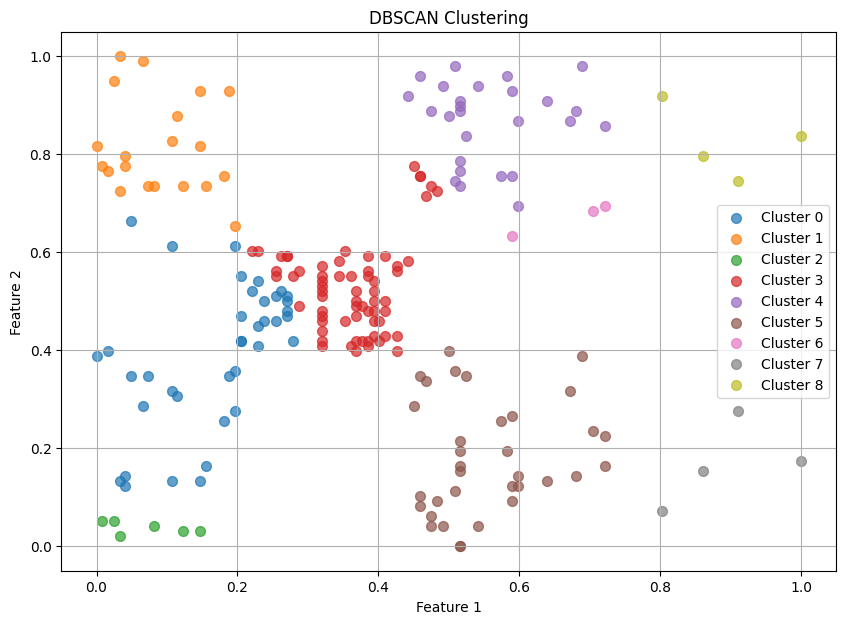

In [31]:
import matplotlib.pyplot as plt
import numpy as np



unique_labels = np.unique(labels)


plt.figure(figsize=(10, 7))
for label in unique_labels:
    cluster_points = X[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', s=50, alpha=0.7)

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [33]:


from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components as needed
gmm.fit(X)


labels = gmm.predict(X)



C:\Users\Sindhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
labels = gmm.predict(X)

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.41417951090606636


C:\Users\Sindhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sindhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sindhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sindhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

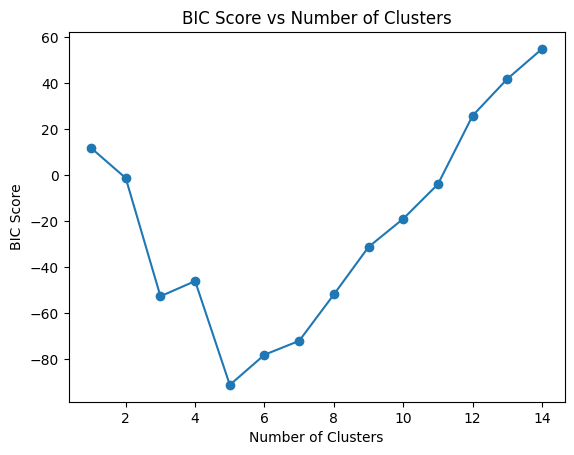

Optimal number of clusters: 5


In [35]:
from sklearn.mixture import GaussianMixture


n_components_range = range(1, 15)  
bic_scores = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

# Plot BIC scores
import matplotlib.pyplot as plt

plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score vs Number of Clusters')
plt.show()

# Optimal number of clusters
optimal_clusters = n_components_range[np.argmin(bic_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")


C:\Users\Sindhu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


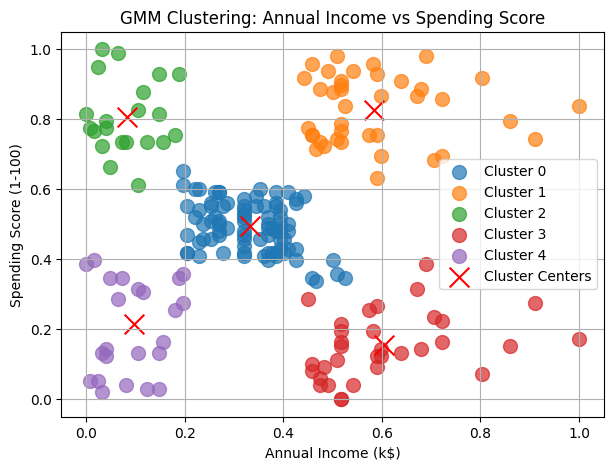

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X)

labels = gmm.predict(X)

df["Cluster"] = labels

plt.figure(figsize=(7, 5))


for cluster in np.unique(labels):
    cluster_points = X[labels == cluster]
    plt.scatter(
        cluster_points[:, 0], cluster_points[:, 1],
        label=f"Cluster {cluster}", s=100, alpha=0.7
    )

centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label="Cluster Centers")


plt.title("GMM Clustering: Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)

